<a href="https://colab.research.google.com/github/Whaleman0423/class_no.4_paper/blob/main/transfer_mobilenet_scooter1105.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import glob
import os
os.chdir("/content/drive/MyDrive/Tebame_第四組_機車辨識")

In [3]:
# 600以上 : S2、GP、KRV、FIDDLE、SR、活力、新名流、DRG、新迪爵、LIMI、六代勁戰
s2 = glob.glob("./原始照片(含外拍及網路)/GOGORO_S2/*") + glob.glob("./裁剪照片(不含不用裁的)/GOGORO_S2_裁/*") 
s2_ = []
for i in range(len(s2)):
  if "JPG" in s2[i] or "jpg" in s2[i]:
    s2_.append(s2[i])
s2 = s2_

gp = glob.glob("./原始照片(含外拍及網路)/KYMCO_GP/*") + glob.glob("./裁剪照片(不含不用裁的)/KYMCO_GP_125_裁/*") 

krv = glob.glob("./原始照片(含外拍及網路)/KYMCO_KRV/*") + glob.glob("./裁剪照片(不含不用裁的)/KYMCO_KRV_裁/*")

fiddle = glob.glob("./原始照片(含外拍及網路)/SYM_FIDDLE/*") + glob.glob("./裁剪照片(不含不用裁的)/SYM_FIDDLE_125_裁/*") 

sr = glob.glob("./原始照片(含外拍及網路)/SYM_JET_SR/*") + glob.glob("./裁剪照片(不含不用裁的)/SYM_JET_SR_125_裁/*")

vivo = glob.glob("./原始照片(含外拍及網路)/SYM_活力/*") + glob.glob("./裁剪照片(不含不用裁的)/SYM_活力_125_裁/*")

famous = glob.glob("./原始照片(含外拍及網路)/KYMCO_新名流/*") + glob.glob("./裁剪照片(不含不用裁的)/KYMCO_新名流125_裁/*")

drg = glob.glob("./原始照片(含外拍及網路)/SYM_DRG/*") + glob.glob("./裁剪照片(不含不用裁的)/SYM_DRG_裁/*") 

duke = glob.glob("./原始照片(含外拍及網路)/SYM_新迪爵/*") + glob.glob("./裁剪照片(不含不用裁的)/SYM_新迪爵_125 _裁/*")

limi = glob.glob("./原始照片(含外拍及網路)/YAMAHA_LIMI/*") + glob.glob("./裁剪照片(不含不用裁的)/YAMAHA_LIMI_125_已裁減/*")

gryphus6 = glob.glob("./原始照片(含外拍及網路)/YAMAHA_六代勁戰/*") + glob.glob("./裁剪照片(不含不用裁的)/YAMAHA_六代勁戰_125_裁/*")
# ["s2", "gp", "krv_x", "fiddle", "sr_x", "vivo", "famous", "drg", "duke", "limi", "gryphus6"

In [4]:
import pandas as pd
df = pd.DataFrame({
    "path": s2 + gp + krv + fiddle + sr + vivo + famous + drg + duke + limi + gryphus6,
    "ans": [0] * len(s2) + [1] * len(gp) + [2] * len(krv) + [3] * len(fiddle) + [4] * len(sr) + [5] * len(vivo) + [6] * len(famous)
    + [7] * len(drg) + [8] * len(duke) + [9] * len(limi) + [10] * len(gryphus6)
})
df

path  ans
0      ./原始照片(含外拍及網路)/GOGORO_S2/180831qbt797we2t_medi...    0
1      ./原始照片(含外拍及網路)/GOGORO_S2/02_s2_abs_indigo_05_f...    0
2      ./原始照片(含外拍及網路)/GOGORO_S2/01_s2_abs_indigo_03_l...    0
3      ./原始照片(含外拍及網路)/GOGORO_S2/1527683192-25814e6d13...    0
4      ./原始照片(含外拍及網路)/GOGORO_S2/3FA8F684E6-SP-9712488...    0
...                                                  ...  ...
11054  ./裁剪照片(不含不用裁的)/YAMAHA_六代勁戰_125_裁/1635242123753...   10
11055  ./裁剪照片(不含不用裁的)/YAMAHA_六代勁戰_125_裁/1635242132239...   10
11056  ./裁剪照片(不含不用裁的)/YAMAHA_六代勁戰_125_裁/1635242140840...   10
11057  ./裁剪照片(不含不用裁的)/YAMAHA_六代勁戰_125_裁/1635242150895...   10
11058  ./裁剪照片(不含不用裁的)/YAMAHA_六代勁戰_125_裁/1635242158605...   10

[11059 rows x 2 columns]

In [ ]:
from tensorflow.keras.applications.mobilenet import MobileNet
mobilenet = MobileNet(
    input_shape=(224, 224, 3), include_top=False, weights='imagenet'
)
mobilenet.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout
mobilenet.layers

In [ ]:
for l in mobilenet.layers:
  l.trainable = False  # cnn 已經是訓練好的了，所以先凍住cnn的參數 ，只訓練後面的mlp的參數 # 要在 compile 前設

layers = [
          BatchNormalization(),
          GlobalAveragePooling2D(),
          Dropout(0.25),
          # Dense(256, activation="relu"),
          Dense(11, activation="softmax")
]
model = Sequential(mobilenet.layers + layers) 
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0         
_________________________________________________________________
conv_pw_1 (Conv2D)           (None, 112, 112, 64)     

In [ ]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(
        loss=SparseCategoricalCrossentropy(),
        optimizer="adam",
        metrics=["acc"]
)

[[[ 0.62352943  0.5921569   0.56078434]
  [ 0.5764706   0.5372549   0.49803925]
  [ 0.60784316  0.5529412   0.49803925]
  ...
  [ 0.6392157   0.6         0.5686275 ]
  [ 0.6392157   0.6         0.5529412 ]
  [ 0.6156863   0.5764706   0.5294118 ]]

 [[ 0.6156863   0.58431375  0.54509807]
  [ 0.5921569   0.5529412   0.5137255 ]
  [ 0.5686275   0.5137255   0.4666667 ]
  ...
  [ 0.654902    0.6156863   0.58431375]
  [ 0.6392157   0.5921569   0.5529412 ]
  [ 0.64705884  0.6         0.56078434]]

 [[ 0.56078434  0.52156866  0.47450984]
  [ 0.5921569   0.54509807  0.49803925]
  [ 0.60784316  0.5529412   0.5058824 ]
  ...
  [ 0.67058825  0.6313726   0.6       ]
  [ 0.6627451   0.62352943  0.58431375]
  [ 0.67058825  0.6313726   0.6       ]]

 ...

 [[-0.5764706  -0.5686275  -0.5058824 ]
  [-0.5686275  -0.5764706  -0.52156866]
  [-0.5764706  -0.58431375 -0.5372549 ]
  ...
  [ 0.7019608   0.6627451   0.6392157 ]
  [ 0.654902    0.60784316  0.58431375]
  [ 0.8039216   0.77254903  0.7411765 ]]

 [

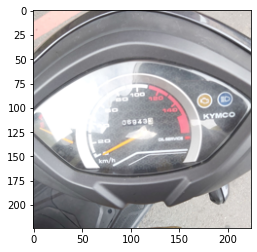

In [ ]:
import random
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
# import 匯入 當初預處理的方式
from tensorflow.keras.applications.mobilenet import preprocess_input 
p = df["path"]
# print(len(p))
idx = random.randint(0, len(p)-1)
img = Image.open(p[idx]).resize((224, 224)).convert("RGB")
img_np = np.array(img)

img_np_pre = preprocess_input(img_np)
print(img_np_pre)
plt.imshow(img)

In [ ]:
x = np.array(df["path"])
y = np.array(df["ans"])

In [ ]:
def data_generator(x, y, batch_size=20):
  while True:
    idx = np.random.randint(0, len(x), size=batch_size)
    x_batch, y_batch = x[idx], y[idx]
    x_final = []
    for path in x_batch:
      img = Image.open(path).resize((224, 224)).convert("RGB")    #  開啟路徑圖檔並改大小、轉成RGB
      img_pre = preprocess_input(np.array(img))              # 轉成陣列再預處理
      x_final.append(img_pre)            
    x_final = np.array(x_final)
    y_batch = np.array(y_batch)
    yield (x_final, y_batch)
gen = data_generator(x, y)
x_gen, y_gen = gen.__next__()
# print(x_gen.shape)
# print(y_gen.shape)
print(x_gen)
# print(y_gen)


[[[[ 0.4431373   0.12156868 -0.38039213]
   [ 0.45098042  0.12941182 -0.372549  ]
   [ 0.4666667   0.14509809 -0.372549  ]
   ...
   [ 0.03529418 -0.09803921 -0.17647058]
   [ 0.05882359 -0.12156862 -0.25490195]
   [ 0.12156868 -0.03529412 -0.15294117]]

  [[ 0.45098042  0.12941182 -0.372549  ]
   [ 0.4666667   0.14509809 -0.36470586]
   [ 0.4666667   0.15294123 -0.36470586]
   ...
   [ 0.02745104 -0.09803921 -0.16862744]
   [ 0.09019613 -0.01960784 -0.10588235]
   [ 0.1686275   0.06666672 -0.03529412]]

  [[ 0.45882356  0.13725495 -0.36470586]
   [ 0.4666667   0.15294123 -0.35686272]
   [ 0.47450984  0.1686275  -0.34117645]
   ...
   [-0.00392157 -0.1372549  -0.15294117]
   [-0.01176471 -0.12156862 -0.16862744]
   [-0.00392157 -0.10588235 -0.16862744]]

  ...

  [[-0.64705884 -0.6392157  -0.62352943]
   [-0.67058825 -0.6313726  -0.6156863 ]
   [-0.6784314  -0.6392157  -0.6156863 ]
   ...
   [-0.7019608  -0.69411767 -0.7411765 ]
   [-0.8509804  -0.84313726 -0.88235295]
   [-0.8509804  

In [ ]:
s2_x = x[y == 0]
gp_x = x[y == 1]
krv_x = x[y == 2]
fiddle_x = x[y == 3]
sr_x = x[y == 4]
vivo_x = x[y == 5]
famous_x = x[y == 6]
drg_x = x[y == 7]
duke_x = x[y == 8]
limi_x = x[y == 9]
gryphus6_x = x[y == 10]

print("s2 共:", len(s2_x))
print("gp 共:", len(gp_x))
print("krv 共:", len(krv_x))
print("fiddle 共:", len(fiddle_x))
print("sr 共:", len(sr_x))
print("vivo 共:", len(vivo_x))
print("famous 共:", len(famous_x))
print("drg 共:", len(drg_x))
print("duke 共:", len(duke_x))
print("limi 共:", len(limi_x))
print("gryphus6 共:", len(gryphus6_x))

s2 共: 822
gp 共: 979
krv 共: 898
fiddle 共: 1317
sr 共: 760
vivo 共: 860
famous 共: 876
drg 共: 900
duke 共: 1159
limi 共: 786
gryphus6 共: 1295


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

 # "path": s2 + gp + krv + fiddle + sr + vivo + famous + drg + duke + limi + gryphus6,
    # "ans": [0] * len(s2) + [1] * len(gp) + [2] * len(krv) + [3] * len(fiddle) + [4] * len(sr) + [5] * len(vivo) + [6] * len(famous)
    # + [7] * len(drg) + [8] * len(duke) + [9] * len(limi) + [10] * len(gryphus6)
scooters = [s2_x, gp_x, krv_x, fiddle_x, sr_x, vivo_x, famous_x, drg_x, duke_x, limi_x, gryphus6_x]
scts_nums = []
# ["s2", "gp", "krv_x", "fiddle", "sr_x", "vivo", "famous", "drg", "duke", "limi", "gryphus6"
for i in scooters:
  a = np.random.choice(i, 760, replace=False)
  b, c = train_test_split(a, test_size=0.1)
  num = (a, b, c)
  scts_nums.append(num)
# print(len(scts_nums[:][]))
# S2_380 = np.random.choice(S2_x, 380, replace=False)
# S2_342, S2_38 = train_test_split(S2_380, test_size=0.1)

a = 684
b = 76
x_train = np.concatenate([x[1] for x in scts_nums])
y_train = np.array([0] * a + [1]*a+[2]*a+[3]*a+[4]*a+[5]*a+[6]*a+[7]*a+[8]*a+[9]*a+[10]*a)

x_test = np.concatenate([x[2] for x in scts_nums])
y_test = np.array([0] * b + [1]*b+[2]*b+[3]*b+[4]*b+[5]*b+[6]*b+[7]*b+[8]*b+[9]*b+[10]*b)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7524,)
(836,)
(7524,)
(836,)


In [ ]:
train_generator = data_generator(x_train, y_train)
test_generator = data_generator(x_test, y_test)

In [ ]:
# 20 * 19 => 380訓練
# 5 * 19 => 38測試
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
             EarlyStopping(patience=10, restore_best_weights=True),
             ModelCheckpoint("/content/1105.h5", save_best_only=True)
]

model.fit(
    train_generator,
    steps_per_epoch=30,
    epochs=300,
    validation_data=test_generator,
    validation_steps=2, 
    callbacks=callbacks
                    )

Epoch 1/300
30/30 [==============================] - 371s 13s/step - loss: 2.3101 - acc: 0.1833 - val_loss: 2.0020 - val_acc: 0.3500
Epoch 2/300
30/30 [==============================] - 340s 12s/step - loss: 1.9554 - acc: 0.3750 - val_loss: 1.6603 - val_acc: 0.4750
Epoch 3/300
30/30 [==============================] - 293s 10s/step - loss: 1.5891 - acc: 0.5367 - val_loss: 1.2226 - val_acc: 0.7000
Epoch 4/300
30/30 [==============================] - 285s 10s/step - loss: 1.4866 - acc: 0.5733 - val_loss: 1.2086 - val_acc: 0.7750
Epoch 5/300
30/30 [==============================] - 286s 10s/step - loss: 1.3003 - acc: 0.6333 - val_loss: 1.2535 - val_acc: 0.5750
Epoch 6/300
30/30 [==============================] - 257s 9s/step - loss: 1.2680 - acc: 0.6217 - val_loss: 1.3116 - val_acc: 0.6000
Epoch 7/300
30/30 [==============================] - 254s 9s/step - loss: 1.1635 - acc: 0.6700 - val_loss: 1.0178 - val_acc: 0.7750
Epoch 8/300
30/30 [==============================] - 212s 7s/step - los

In [ ]:
ori_imgs = []
for p in x_test:
    img = Image.open(p).resize((224, 224)).convert("RGB")
    ori_imgs.append(np.array(img))
ori_imgs = np.array(ori_imgs)
preprocess_imgs = preprocess_input(ori_imgs)

pre = model.predict(preprocess_imgs)



In [ ]:
pre = pre.argmax(axis=1)

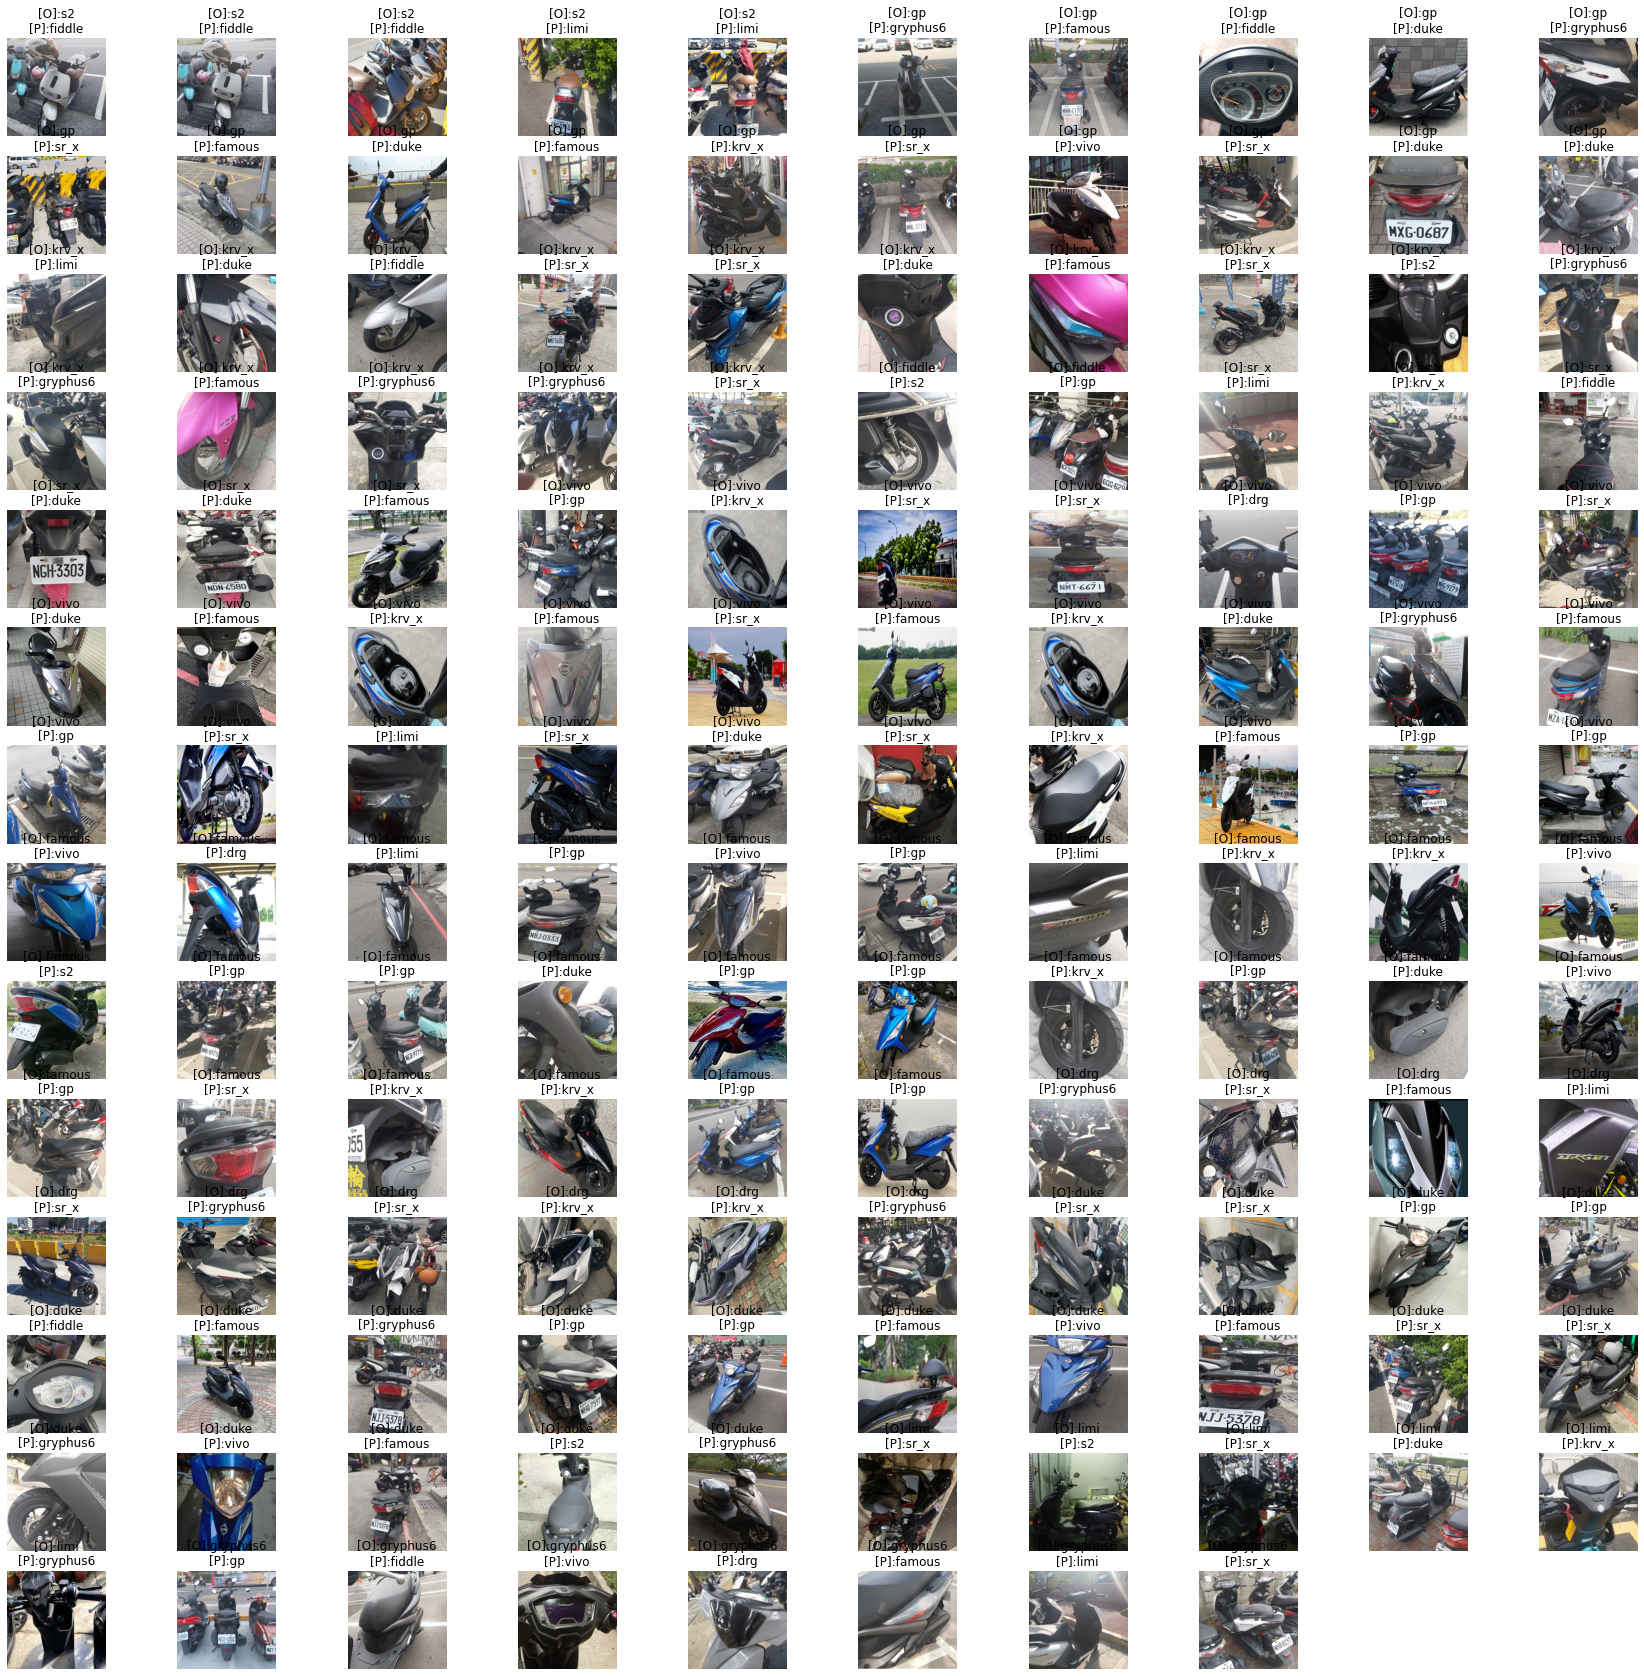

In [ ]:
trans = ["s2", "gp", "krv_x", "fiddle", "sr_x", "vivo", "famous", "drg", "duke", "limi", "gryphus6"]
 # gp + vivo + gryphus6 + SR + DRG + FIDDLE + S2
idx = np.nonzero(pre != y_test)[0]
pre_false_img = ori_imgs[idx]
pre_false_val = pre[idx]
pre_false_ori = y_test[idx]

plt.figure(figsize=(30, 30))
width = 10
height = len(idx) // width + 1
for i in range(len(idx)):
    plt.subplot(height, width, i+1)
    t = "[O]:{}\n[P]:{}".format(trans[pre_false_ori[i]],
                                trans[pre_false_val[i]])
    plt.title(t)
    plt.axis("off")
    plt.imshow(pre_false_img[i])


In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, pre)
pd.DataFrame(
        mat,
        index=["{}(正確)".format(trans[i]) for i in range(11)],
        columns=["{}(預測)".format(trans[i]) for i in range(11)]
)

s2(預測)  gp(預測)  krv_x(預測)  ...  duke(預測)  limi(預測)  gryphus6(預測)
s2(正確)            71       0          0  ...         0         2             0
gp(正確)             0      61          1  ...         4         0             2
krv_x(正確)          1       0         61  ...         2         1             4
fiddle(正確)         1       1          0  ...         0         0             0
sr_x(正確)           0       0          1  ...         2         1             0
vivo(正確)           0       5          4  ...         3         1             1
famous(正確)         1      10          5  ...         2         2             0
drg(正確)            0       0          2  ...         0         1             3
duke(正確)           1       4          0  ...        57         0             3
limi(正確)           1       0          1  ...         1        70             1
gryphus6(正確)       0       1          0  ...         0         1            69

[11 rows x 11 columns]

In [ ]:
model = load_model('/content/1105.h5')

Enter:https://cdn2.ettoday.net/images/4352/d4352240.jpg


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


預測: s2
機率: [9.8577023e-01 1.2616346e-04 5.8490394e-05 3.7748327e-03 8.7356011e-06
 1.0434537e-03 2.6036409e-04 9.5410636e-05 6.0157978e-05 8.7070437e-03
 9.5108378e-05]


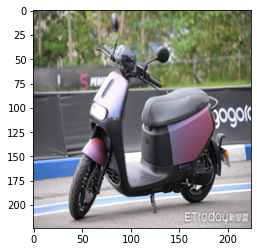

In [ ]:
import requests
from tensorflow.keras.models import load_model
url = input("Enter:")
response = requests.get(url, stream=True, verify=False)
img = Image.open(response.raw).resize((224, 224)).convert("RGB")
img_np = preprocess_input(np.array(img).reshape(1, 224, 224, 3))
# model = load_model('/content/1105.h5').
proba = model.predict(img_np)
ans = proba.argmax(axis=1)
print("預測:", trans[ans[0]])
print("機率:", proba[0])
plt.imshow(img)
# trans = ["s2", "gp", "krv_x", "fiddle", "sr_x", "vivo", "famous", "drg", "duke", "limi", "gryphus6"]

In [46]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input, decode_predictions
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from tensorflow.keras.models import load_model


In [47]:
# clear graph
K.clear_session()

In [48]:
model = load_model("/content/1105.h5")
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0         
_________________________________________________________________
conv_pw_1 (Conv2D)           (None, 112, 112, 64)     

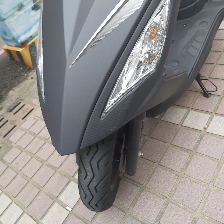

In [91]:
p = df["path"]
idx = np.random.randint(0, len(p), size=1)[0]  # 隨機取一張圖
path = p[idx]

img = image.load_img(path, target_size=(224,224))
cv2_imshow(cv2.resize(cv2.imread(path), (224,224)))

In [92]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
trans = ["s2", "gp", "krv_x", "fiddle", "sr_x", "vivo", "famous", "drg", "duke", "limi", "gryphus6"]
preds = model.predict(x)
ans = preds.argmax(axis=1)
print("預測:", trans[ans[0]])
print("機率:", preds[0])

預測: duke
機率: [1.7174720e-05 1.8757753e-03 6.7941687e-04 1.1061661e-04 4.2354374e-04
 1.7428828e-03 3.5244919e-02 3.8204770e-04 9.5942020e-01 2.3991794e-05
 7.9426609e-05]


In [93]:
with tf.GradientTape() as tape:
  last_conv_layer = model.get_layer("conv_pw_13")
  iterate = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output])
  model_out, last_conv_layer = iterate(x)
  class_out = model_out[:, np.argmax(model_out[0])]
  grads = tape.gradient(class_out, last_conv_layer)
  pooled_grads = K.mean(grads, axis=(0, 1, 2))

heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1) 


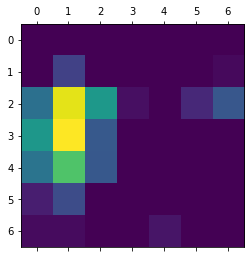

In [94]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
heatmap = heatmap.reshape((7, 7))
plt.matshow(heatmap)
plt.show()

In [95]:
img = cv2.imread(path)

In [96]:
INTENSITY = 0.5

heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

heatmap = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)

img = heatmap * INTENSITY +img


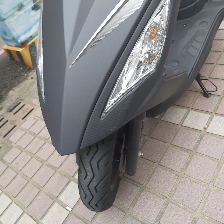

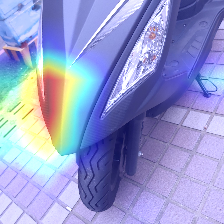

In [97]:
cv2_imshow(cv2.resize(cv2.imread(path), (224,224)))
img = cv2.resize(img, (224,224))
cv2_imshow(img)